# Lasso, Ridge, and Elastic Net Regression in Scikit-Learn

This notebook demonstrates the implementation of **Lasso (L1 Regularization)**, **Ridge (L2 Regularization)**, and **Elastic Net (Combination of L1 & L2 Regularization)** regression using `scikit-learn`. It also provides the mathematical formulas for these techniques and visualizes overfitting effects.

## Formulas

### Ridge Regression (L2 Regularization)
Ridge regression adds a penalty on the size of coefficients to prevent overfitting:
$$ \min_{w, b} \sum_{i=1}^{n} (y_i - (wX_i + b))^2 + \lambda \sum_{j=1}^{m} w_j^2 $$

### Lasso Regression (L1 Regularization)
Lasso regression encourages sparsity in the coefficients:

$$ \min_{w, b} \sum_{i=1}^{n} (y_i - (wX_i + b))^2 + \lambda \sum_{j=1}^{m} |w_j| $$

### Elastic Net Regression (Combination of L1 and L2)
Elastic Net combines L1 and L2 penalties:

$$ \min_{w, b} \sum_{i=1}^{n} (y_i - (wX_i + b))^2 + \lambda_1 \sum_{j=1}^{m} |w_j| + \lambda_2 \sum_{j=1}^{m} w_j^2 $$

---


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [25]:
np.random.seed(42)

### Here we generate a fake data, that will illustrate overfit

In [26]:
x = np.linspace(0, 10, 100)
y = 3 * x + np.random.normal(0, 2, 100)
X = x.reshape(-1, 1)
X_poly = np.column_stack([X, X**2, X**3, np.sin(X)])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [28]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)  
elastic_net.fit(X_train, y_train)
y_pred_elastic = elastic_net.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_elastic = mean_squared_error(y_test, y_pred_elastic)

Z:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.708e+01, tolerance: 6.498e-01
  model = cd_fast.enet_coordinate_descent(
Z:\anaconda\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.881e+01, tolerance: 6.498e-01
  model = cd_fast.enet_coordinate_descent(


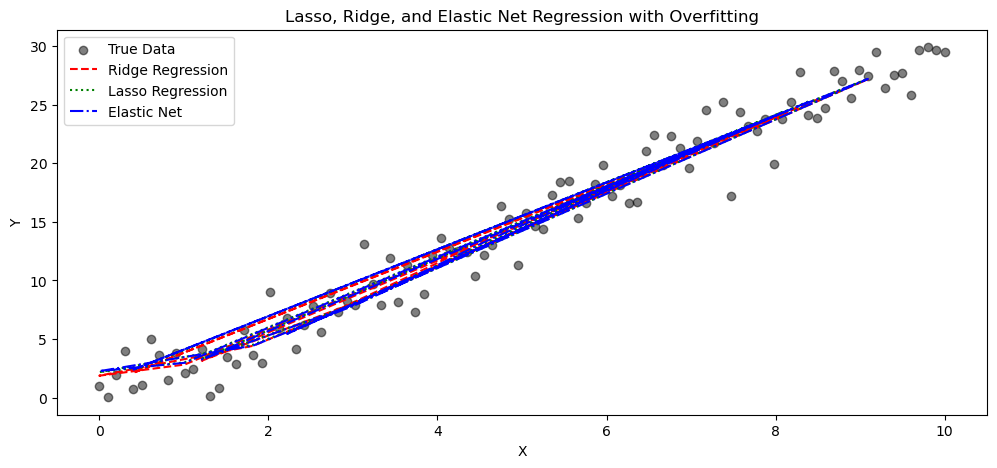

Ridge Regression MSE: 2.6574513183394344
Lasso Regression MSE: 2.6977484521860666
Elastic Net Regression MSE: 2.738997458412102


In [29]:
plt.figure(figsize=(12, 5))

plt.scatter(X[:, 0], y, label='True Data', color='black', alpha=0.5)
plt.plot(X_test[:, 0], y_pred_ridge, label='Ridge Regression', color='red', linestyle='dashed')
plt.plot(X_test[:, 0], y_pred_lasso, label='Lasso Regression', color='green', linestyle='dotted')
plt.plot(X_test[:, 0], y_pred_elastic, label='Elastic Net', color='blue', linestyle='dashdot')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Lasso, Ridge, and Elastic Net Regression with Overfitting')
plt.show()

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Elastic Net Regression MSE: {mse_elastic}')

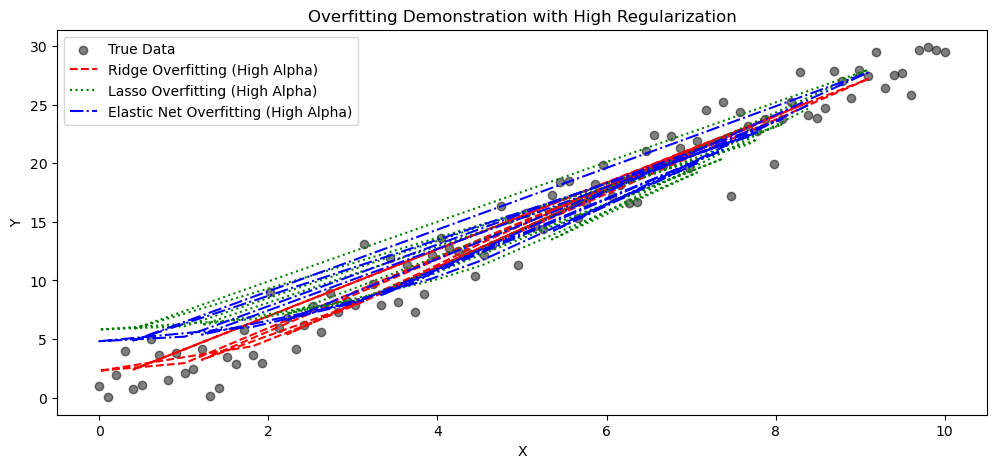

Ridge Regression MSE: 2.758218939676511
Lasso Regression MSE: 7.8450485543155795
Elastic Net Regression MSE: 5.488636431853209


In [32]:
ridge_high_alpha = Ridge(alpha=10.0)
lasso_high_alpha = Lasso(alpha=10.0)
elastic_high_alpha = ElasticNet(alpha=10.0, l1_ratio=0.5)

ridge_high_alpha.fit(X_train, y_train)
lasso_high_alpha.fit(X_train, y_train)
elastic_high_alpha.fit(X_train, y_train)

y_pred_ridge_high = ridge_high_alpha.predict(X_test)
y_pred_lasso_high = lasso_high_alpha.predict(X_test)
y_pred_elastic_high = elastic_high_alpha.predict(X_test)

plt.figure(figsize=(12, 5))
plt.scatter(X[:, 0], y, label='True Data', color='black', alpha=0.5)
plt.plot(X_test[:, 0], y_pred_ridge_high, label='Ridge Overfitting (High Alpha)', color='red', linestyle='dashed')
plt.plot(X_test[:, 0], y_pred_lasso_high, label='Lasso Overfitting (High Alpha)', color='green', linestyle='dotted')
plt.plot(X_test[:, 0], y_pred_elastic_high, label='Elastic Net Overfitting (High Alpha)', color='blue', linestyle='dashdot')

plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Overfitting Demonstration with High Regularization')
plt.show()

mse_ridge = mean_squared_error(y_test, y_pred_ridge_high)
mse_lasso = mean_squared_error(y_test, y_pred_lasso_high)
mse_elastic = mean_squared_error(y_test, y_pred_elastic_high)

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Elastic Net Regression MSE: {mse_elastic}')